In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from skimage import io

In [2]:
# Collect all data and only pick the pick up and drop out zone ID
PU_heat_map = {}
DO_heat_map = {}
for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    filename = 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-' + month + '.csv'
    df = pd.read_csv(filename)
    PUID = df['PULocationID'].value_counts()
    DOID = df['DOLocationID'].value_counts()
    for ele in PUID.index:
        if ele not in PU_heat_map:
            PU_heat_map[ele] = PUID[ele]
        else:
            PU_heat_map[ele] += PUID[ele]
    for ele in DOID.index:
        if ele not in DO_heat_map:
            DO_heat_map[ele] = DOID[ele]
        else:
            DO_heat_map[ele] += DOID[ele]

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
import csv
from collections import defaultdict
with open('taxi+_zone_lookup.csv', 'r') as rf:
    reader = csv.reader(rf)
    mydict = defaultdict(list)
    mydict_zone = defaultdict(list)
    borough_vs_zone = defaultdict(list)
    for rows in reader:
        for cols in reader: 
            mydict[cols[1]].append(cols[0])
            mydict_zone[cols[0]].append(cols[2])
            borough_vs_zone[cols[1]].append(cols[2])

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv') #this reads one .csv file at a time
df = df.iloc[:20, :] #only showing the first 20 rows for now
df.head() #shows all the columns with values but you can give a number to read first # of rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [5]:
print(max(PU_heat_map.values()))

332473


In [3]:
# Load the data we get from the visualization part
max_num = max(PU_heat_map.values())
bronx_img = io.imread('./taxi_zone_map_bronx.jpg')
brooklyn_img = io.imread('./taxi_zone_map_brooklyn.jpg')
manhattan_img = io.imread('./taxi_zone_map_manhattan.jpg')
queens_img = io.imread('./taxi_zone_map_queens.jpg')
staten_img = io.imread('./taxi_zone_map_staten_island.jpg')
bronx_label = np.load('./bronx_label_d.npy',allow_pickle=True)
bronx_label = dict(bronx_label.item())
brooklyn_label = np.load('./brooklyn_label_d.npy',allow_pickle=True)
brooklyn_label = dict(brooklyn_label.item())
manhattan_label = np.load('./manhattan_label_d.npy',allow_pickle=True)
manhattan_label = dict(manhattan_label.item())
queens_label = np.load('./queens_label_d.npy',allow_pickle=True)
queens_label = dict(queens_label.item())
staten_label = np.load('./staten_island_label_d.npy',allow_pickle=True)
staten_label = dict(staten_label.item())

In [4]:
label_zone_d={200:('bronx',2),240:('bronx',25),259:('bronx',86),220:('bronx',303),
              241:('bronx',428),174:('bronx',513),254:('bronx',284),81:('bronx',379),51:('bronx',(595,632)),
             184:('bronx',(661,995,1698)),46:('bronx',(2078,2081,2434,2635)),3:('bronx',992),32:('bronx',1055),31:('bronx',(938,962,998)),
             20:('bronx',1243),18:('bronx',(728,1030)),136:('bronx',868),94:('bronx',(1352,1507)),185:('bronx',1736),
             183:('bronx',(2034,2292)),58:('bronx',2530),208:('bronx',2738),213:('bronx',(3516,3532)),250:('bronx',2677),
             182:('bronx',2695),242:('bronx',(1998,2015,2049)),212:('bronx',3142),248:('bronx',(2747,2922)),
             60:('bronx',(2660,2671)),78:('bronx',1841),47:('bronx',(1979,2046,2123,2246,2483)),59:('bronx',(2383,2581)),126:('bronx',3368),
             147:('bronx',(3254,3638)),199:('bronx',4135),168:('bronx',3625),159:('bronx',3389),167:('bronx',(2874,3032)),
             69:('bronx',(2283,2369,2472,2588,2606,2861)),247:('bronx',(2147,2571,2580,2642,2684,3055)),119:('bronx',(2083,2202,)),169:('bronx',1681),235:('bronx',1301),
              112:('brooklyn',1),255:('brooklyn',(73,104)),80:('brooklyn',(76,77,80,93,98,143,182,221)),256:('brooklyn',(187,200)),
              217:('brooklyn',309),37:('brooklyn',262),36:('brooklyn',390),66:('brooklyn',(308,310)),
              34:('brooklyn',(365,387)),33:('brooklyn',354),65:('brooklyn',460),97:('brooklyn',597),
              49:('brooklyn',651),17:('brooklyn',505),225:('brooklyn',682),63:('brooklyn',1044),
              177:('brooklyn',(1189,1507)),61:('brooklyn',1263),189:('brooklyn',(1138,1406)),25:('brooklyn',736),
              52:('brooklyn',(741,936)),54:('brooklyn',(701,903)),40:('brooklyn',982),195:('brooklyn',(868,1004)),
              106:('brooklyn',(1167,1173,1355)),181:('brooklyn',(1067,1102,1445)),190:('brooklyn',(1556,1803)),62:('brooklyn',1665),
              188:('brooklyn',2002),35:('brooklyn',1772),77:('brooklyn',1732),76:('brooklyn',1562),222:('brooklyn',2774),
              72:('brooklyn',2098),71:('brooklyn',2444),85:('brooklyn',(2443,2617)),89:('brooklyn',2395),
              257:('brooklyn',(2010,2373)),111:('brooklyn',2055),228:('brooklyn',(1593,1627,1840,1935,2197)),227:('brooklyn',(2338,2498,2607)),
              133:('brooklyn',2671),26:('brooklyn',2779),39:('brooklyn',2687),91:('brooklyn',3156),
              155:('brooklyn',(3563,3831)),165:('brooklyn',3483),178:('brooklyn',(3552,3561)),22:('brooklyn',(3501,3530)),
              11:('brooklyn',3813),67:('brooklyn',(3178,3473)),14:('brooklyn',(2560,2719)),21:('brooklyn',(3856,4038,4249)),
              123:('brooklyn',4003),149:('brooklyn',3976),108:('brooklyn',4449),210:('brooklyn',(4421,4442)),
              29:('brooklyn',4653),55:('brooklyn',4764),150:('brooklyn',4969),154:('brooklyn',(4204,4493)),
              153:('manhattan',47),127:('manhattan',(89,138)),128:('manhattan',(3,34,56)),243:('manhattan',120),
              120:('manhattan',(215,353)),244:('manhattan',(300,356)),116:('manhattan',438),152:('manhattan',(557,569)),
              42:('manhattan',(452,464,512,537,603)),166:('manhattan',(623,720)),41:('manhattan',741),74:('manhattan',797),
              194:('manhattan',(973,1020,1229)),24:('manhattan',(806,876)),151:('manhattan',848),
              43:('manhattan',(933,939,978,1015,1037,1090,1122,1266,1306,1338,1384,1404)),
              75:('manhattan',1019),238:('manhattan',938),239:('manhattan',1102),143:('manhattan',(1344,1468)),
              142:('manhattan',(1409,1601)),236:('manhattan',(1251,1449)),237:('manhattan',(1597,1826)),263:('manhattan',(1352,1557,1561)),
              141:('manhattan',(1685,1954)),262:('manhattan',(1439,1635)),140:('manhattan',(1768,1962)),202:('manhattan',(1800,2233,2249)),
              50:('manhattan',(1613,1781)),246:('manhattan',(1965,2298)),48:('manhattan',(1754,1974)),68:('manhattan',(2186,2528)),
              163:('manhattan',(1834,1957)),230:('manhattan',(1950,2116)),100:('manhattan',(2216,2343)),186:('manhattan',(2433,2555)),
              90:('manhattan',(2633,2744)),161:('manhattan',(2013,2187)),164:('manhattan',(2335,2620)),234:('manhattan',(2693,2845)),
              162:('manhattan',(2079,2336)),170:('manhattan',(2424,2626)),107:('manhattan',(2789,2929)),229:('manhattan',(2140,2337)),
              233:('manhattan',(2392,2561)),137:('manhattan',(2738,2861)),224:('manhattan',(3004,3140)),158:('manhattan',(2740,2963)),
              249:('manhattan',(2808,2980)),113:('manhattan',(2921,2948)),114:('manhattan',(3040,3174)),79:('manhattan',(3037,3056)),
              4:('manhattan',3227),125:('manhattan',(3125,3253)),211:('manhattan',(3184,3320)),144:('manhattan',(3305,3402)),
              148:('manhattan',(3363,3480)),232:('manhattan',(3453,3529)),231:('manhattan',3240),45:('manhattan',3509),
              209:('manhattan',3630),13:('manhattan',(3428,3623)),261:('manhattan',(3584,3689)),87:('manhattan',(3659,3725,3738)),
              12:('manhattan',0),88:('manhattan',3736),105:('manhattan',(3826,3838)),103:('manhattan',0),95:('queens',1933),
              104:('manhattan',3788),145:('queens',878),193:('queens',(477,713)),146:('queens',(776,853,888)),179:('queens',(176,336)),
              8:('queens',(115,187)),223:('queens',6),7:('queens',459),226:('queens',(1020,1031)),260:('queens',(768,1388,1546)),
              207:('queens',(622,634,794)),138:('queens',(209,259)),129:('queens',558),70:('queens',538),83:('queens',(1343,1646)),
              82:('queens',(1390,1793,1841)),157:('queens',(1875,2283,2450)),160:('queens',2199),198:('queens',(2521,2632)),
              96:('queens',(2984,2992,3117,3127,3155,3164)),102:('queens',(2819,2887,2943,3001,3018)),
              196:('queens',(2039,2147)),56:('queens',(1482)),173:('queens',1067),57:('queens',0),
              93:('queens',991),253:('queens',(884,1091)),92:('queens',(579,625)),53:('queens',13),252:('queens',1),
              15:('queens',(104,228,328)),16:('queens',649),171:('queens',436),73:('queens',1151),9:('queens',899),
              192:('queens',1483),64:('queens',584),101:('queens',(1576,1593)),19:('queens',1946),175:('queens',(1371,2123)),
              98:('queens',1981),131:('queens',2526),121:('queens',2097),135:('queens',1824),134:('queens',2831),
              28:('queens',2795),191:('queens',2602),122:('queens',(2912,2976)),130:('queens',(3015,3026,3069,3099,3177)),197:('queens',3191),
              258:('queens',(3288,3411)),180:('queens',3745),124:('queens',3865),216:('queens',3612),10:('queens',(3715,3726)),
              215:('queens',(3345,3355,3374)),205:('queens',3231),38:('queens',3496),139:('queens',(3816,3852)),30:('queens',(4905,5133,5166)),
              218:('queens',3905),219:('queens',4138),203:('queens',(3991,4006,4048,4304,4394)),132:('queens',(4100,4152)),
              2:('queens',(4509,4519,4529,4608,4610,4614,4621,4732,4814,4823,4844,4882,5026,5049,5068,5236)),
              86:('queens',5009),117:('queens',(5064,5181,5208,5335)),201:('queens',(5389,5421,5428,5433,5452)),
              156:('staten_island',39),27:('queens',(5484,5488,5500,5523,5527,5530,5540)),
              187:('staten_island',(118,516,676)),251:('staten_island',(410,447)),245:('staten_island',(174,219)),
              206:('staten_island',(1,25,125,134)),115:('staten_island',(338,356,368,391,397,445,668)),221:('staten_island',(239,691)),
              23:('staten_island',322),99:('staten_island',(1164,1540,1579,1587,1602,1618,1634,1648,1678)),
              6:('staten_island',1054),214:('staten_island',(1195,1202,1212)),172:('staten_island',1582),
              176:('staten_island',(1731,1777,1779)),110:('staten_island',(2168,2246,2586,2590)),109:('staten_island',1844),
              5:('staten_island',(1935,1947,1953,1975,1982,2013)),118:('staten_island',(967,1192,1269,1276,1281,1359)),
              84:('staten_island',(2056,2080,2119,2126,2159,2245,2454,2472,2494,2524,2535,2542,2549,2560,2569,2625,2634,2645,2708,2709,2720,2722,2742,2743,2751)),
              204:('staten_island',2146),44:('staten_island',(2180,2270,2284,2367,2389,2404))}

In [32]:
# Print the hot map on the original image
for loc in PU_heat_map.keys():
    passengers = PU_heat_map[loc]
    if loc not in label_zone_d:
        continue
    city = label_zone_d[loc][0]
    label = label_zone_d[loc][1]
    if label == 0:
        continue
    if city == 'bronx':
        if isinstance(label,int):
            for pixel in bronx_label[label]:
                row = pixel[0]
                col = pixel[1]
                bronx_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in bronx_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    bronx_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'brooklyn':
        if isinstance(label,int):
            for pixel in brooklyn_label[label]:
                row = pixel[0]
                col = pixel[1]
                brooklyn_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in brooklyn_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    brooklyn_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'manhattan':
        if isinstance(label,int):
            for pixel in manhattan_label[label]:
                row = pixel[0]
                col = pixel[1]
                manhattan_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in manhattan_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    manhattan_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'queens':
        if isinstance(label,int):
            for pixel in queens_label[label]:
                row = pixel[0]
                col = pixel[1]
                queens_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in queens_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    queens_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'staten_island':
        if isinstance(label,int):
            for pixel in staten_label[label]:
                row = pixel[0]
                col = pixel[1]
                staten_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in staten_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    staten_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]

In [33]:
io.imsave('./PU_heat_map_bronx.jpg',bronx_img)
io.imsave('./PU_heat_map_brooklyn.jpg',brooklyn_img)
io.imsave('./PU_heat_map_manhattan.jpg',manhattan_img)
io.imsave('./PU_heat_map_queens.jpg',queens_img)
io.imsave('./PU_heat_map_staten_island.jpg',staten_img)

In [34]:
for loc in DO_heat_map.keys():
    passengers = DO_heat_map[loc]
    if loc not in label_zone_d:
        continue
    city = label_zone_d[loc][0]
    label = label_zone_d[loc][1]
    if label == 0:
        continue
    if city == 'bronx':
        if isinstance(label,int):
            for pixel in bronx_label[label]:
                row = pixel[0]
                col = pixel[1]
                bronx_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in bronx_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    bronx_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'brooklyn':
        if isinstance(label,int):
            for pixel in brooklyn_label[label]:
                row = pixel[0]
                col = pixel[1]
                brooklyn_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in brooklyn_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    brooklyn_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'manhattan':
        if isinstance(label,int):
            for pixel in manhattan_label[label]:
                row = pixel[0]
                col = pixel[1]
                manhattan_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in manhattan_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    manhattan_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'queens':
        if isinstance(label,int):
            for pixel in queens_label[label]:
                row = pixel[0]
                col = pixel[1]
                queens_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in queens_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    queens_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
    elif city == 'staten_island':
        if isinstance(label,int):
            for pixel in staten_label[label]:
                row = pixel[0]
                col = pixel[1]
                staten_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]
        else:
            for pos in label:
                for pixel in staten_label[pos]:
                    row = pixel[0]
                    col = pixel[1]
                    staten_img[row-1:row+2,col-1:col+2] = [int(np.ceil((1-passengers/max_num)*255)),255,255]

In [35]:
io.imsave('./DO_heat_map_bronx.jpg',bronx_img)
io.imsave('./DO_heat_map_brooklyn.jpg',brooklyn_img)
io.imsave('./DO_heat_map_manhattan.jpg',manhattan_img)
io.imsave('./DO_heat_map_queens.jpg',queens_img)
io.imsave('./DO_heat_map_staten_island.jpg',staten_img)

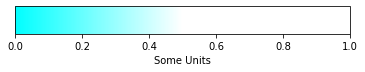

In [31]:
# Print the color bar
import matplotlib.pyplot as plt
import matplotlib as mpl

cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  1.0,  1.0),
                   (1.0,  1.0,  1.0)),

         'blue':  ((0.0,  1.0,  1.0),
                   (1.0,  1.0,  1.0))}
plt.register_cmap(name='Custom', data=cdict)
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.get_cmap('Custom')
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=None, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')